In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [22]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
dataset = pd.read_csv("LVL5 (MEDIUM).csv",header=0, delimiter=';') 
dataset.head()

,Chomper_Kill,Spitter_Kill,Spike_Hit,Spitter_Hit,Chomper_Hit,Death_Fall,Death_Acid,Column_Des,Box_Pushed,Key1_Pickup,Key2_Pickup,Key3_Pickup,Health_Pickup,Switch_Enabled,Quiz_Start,Correct_Ans,Wrong_Ans
0,6,0,0,2,0,1,0,0,0,1,1,1,1,0,1,3,0
1,6,0,0,1,1,0,0,0,0,1,1,1,2,0,1,3,0
2,5,0,0,0,2,0,0,0,0,1,1,1,1,0,1,3,1
3,4,0,0,2,1,1,0,0,0,1,1,0,1,0,0,0,0
4,6,0,0,1,0,0,1,0,0,1,1,1,1,0,1,3,0


In [23]:
# selection des colonnes à prendre en compte dans l'ACP
from sklearn import preprocessing
X_dataset = dataset[["Chomper_Kill","Spitter_Hit","Death_Fall","Death_Acid","Chomper_Hit","Key1_Pickup","Key2_Pickup","Health_Pickup","Key3_Pickup","Quiz_Start","Correct_Ans","Wrong_Ans"]]
features = dataset.columns
# normalize the data attributes
normalized_d = preprocessing.normalize(X_dataset)
standardized_X = preprocessing.scale(normalized_d)
features

Index([u'Chomper_Kill', u'Spitter_Kill', u'Spike_Hit', u'Spitter_Hit',
       u'Chomper_Hit', u'Death_Fall', u'Death_Acid', u'Column_Des',
       u'Box_Pushed ', u'Key1_Pickup', u'Key2_Pickup', u'Key3_Pickup',
       u'Health_Pickup', u'Switch_Enabled', u'Quiz_Start', u'Correct_Ans',
       u'Wrong_Ans'],
      dtype='object')

In [24]:
print(normalized_d)
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(standardized_X)
X_scaled = std_scale.transform(standardized_X)

[[0.80903983 0.26967994 0.13483997 ... 0.13483997 0.40451992 0.        ]
 [0.80903983 0.13483997 0.         ... 0.13483997 0.40451992 0.        ]
 [0.75377836 0.         0.         ... 0.15075567 0.45226702 0.15075567]
 ...
 [0.81649658 0.         0.         ... 0.13608276 0.40824829 0.        ]
 [0.80178373 0.13363062 0.         ... 0.13363062 0.40089186 0.        ]
 [0.79471941 0.26490647 0.         ... 0.13245324 0.39735971 0.        ]]


In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(2,'k-means++',1000,10,0)
kmeans.fit(X_scaled)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[-1.43513161  1.3640293   0.85610029 -0.06384026  1.490307    0.92587708
  -0.5882589   0.37027214 -2.27414089 -1.87866797 -2.45152111 -0.52769948]
 [ 0.2050188  -0.19486133 -0.12230004  0.00912004 -0.212901   -0.13226815
   0.08403699 -0.05289602  0.32487727  0.26838114  0.3502173   0.07538564]]
[1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


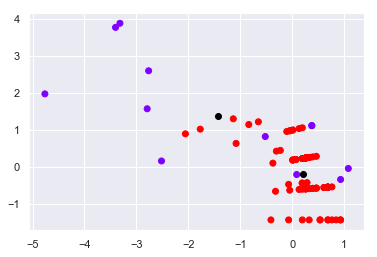

In [26]:
plt.scatter(X_scaled[:,0],X_scaled[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [11]:
corrMatrix = dataset.corr()
print (corrMatrix)

                Chomper_Kill  Spitter_Kill  Spike_Hit  Spitter_Hit  \
Chomper_Kill        1.000000           NaN        NaN    -0.215320   
Spitter_Kill             NaN           NaN        NaN          NaN   
Spike_Hit                NaN           NaN        NaN          NaN   
Spitter_Hit        -0.215320           NaN        NaN     1.000000   
Chomper_Hit         0.122624           NaN        NaN    -0.164818   
Death_Fall          0.082214           NaN        NaN     0.012598   
Death_Acid          0.100238           NaN        NaN    -0.125986   
Column_Des               NaN           NaN        NaN          NaN   
Box_Pushed               NaN           NaN        NaN          NaN   
Key1_Pickup         0.084411           NaN        NaN     0.264766   
Key2_Pickup         0.311774           NaN        NaN     0.068425   
Key3_Pickup         0.351610           NaN        NaN    -0.031759   
Health_Pickup       0.103911           NaN        NaN     0.308110   
Switch_Enabled      

In [27]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [28]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X_scaled)
labels = model.labels_

print(labels)

[1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


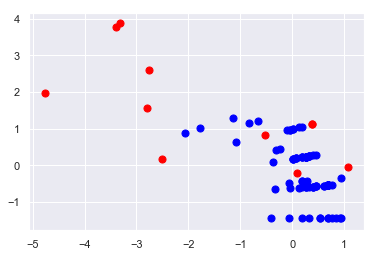

In [29]:
plt.scatter(X_scaled[labels==0, 0], X_scaled[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X_scaled[labels==1, 0], X_scaled[labels==1, 1], s=50, marker='o', color='blue')

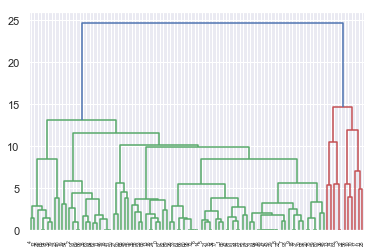

In [30]:
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

In [31]:
 classe=[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dataset['Classe'] = classe
dataset.to_csv(r'C:\Users\sofiane\Desktop\Master project/LVL5(MEDIUM)_Classified.csv', index = None, header=True)